

# Project: Investigate a Dataset -TMBD Movies
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>I use this data set contains information about 10,000 movies collected from The Movie Database (TMDb), I'll use this data to explore things.

**Columns List:** 
- id
- imdb_id
- popularity
- budget
- revenue
- original_title
- cast
- homepage
- director
- tagline
- keywords
- overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj
- revenue_adj


### Question(s) for Analysis
- What is the runtime of most movies—two hours or less?
- What is the year that the most movies were released?
- Is there any relationship between the runtime and vote_average?

<a id='wrangling'></a>
## Data Wrangling



In [49]:
#import the packages i'll use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#Load the data and print out a 5 lines.
Data=pd.read_csv("tmdb-movies.csv")
Data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [57]:
#Check size of the dataframe.
Data.shape

(10866, 21)

In [58]:
#Check the types of columns.
Data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [59]:
#Check whether there are any missing values in the columns.
Data.isna().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [60]:
#Check whether there are any duplicate Values.
sum(Data.duplicated())

1

After all this operations i can noticed that the data about 21 colomns & 10866 rows, The type of column release_date is wrong should be another type, The data has 9 columns that have missing values, And one duplicate value.


### Data Cleaning


In [61]:
#Drop duplicate value
Data.drop_duplicates(inplace=True)

In [62]:
#Chamge the values that contain 0 to NAN 
Data['runtime'] =Data['runtime'].replace(0, np.NAN)
Data['revenue'] =Data['revenue'].replace(0, np.NAN)
Data['budget'] =Data['budget'].replace(0, np.NAN)

In [63]:
#Drop missing values
Data.dropna(inplace=True)

In [64]:
#Change the type of release_date to datetime
Data['release_date'] = pd.to_datetime(Data.release_date)

<a id='eda'></a>
## Exploratory Data Analysis






### Is there any relationship between the runtime and vote_average?

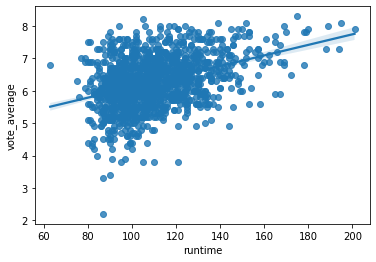

In [68]:
sns.regplot(x=Data['runtime'], y=Data['vote_average'])
plt.show()

There is no relationship between them. That means the runtime of the movies doesn't matter. What matters is what the movie presents.

### What is the runtime of most movies, two hours or less?

In [46]:
conditions = [
    Data.runtime >= 120,  
    Data.runtime <= 119   
]

values = ['Two hours & more', 'Less than two hours']
Data['runtime'] = np.select(conditions, values)

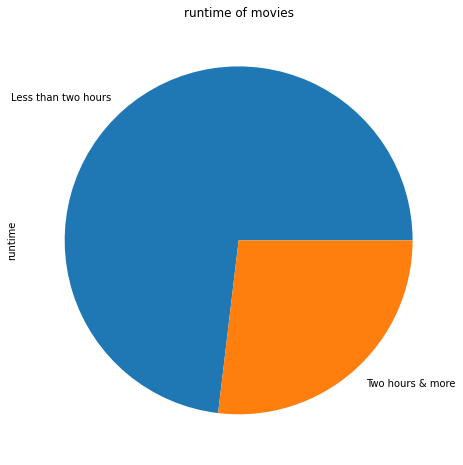

In [47]:
Data['runtime'].value_counts().plot(kind='pie', figsize=(8, 8));
plt.title('runtime of movies');

I have noticed that the runtime of most of the movies is less than two hours.

### What is the year that the most movies were released?

Text(0, 0.5, 'Number of movies')

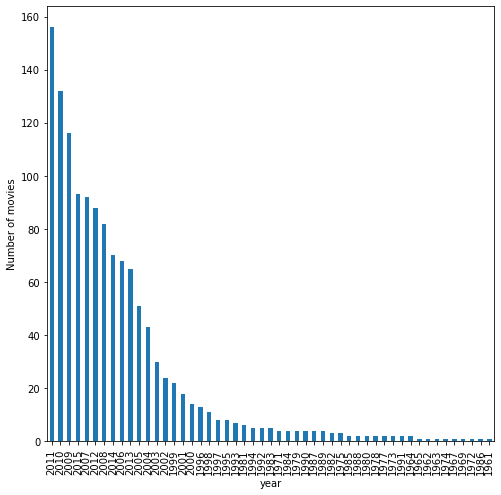

In [50]:
Data['release_year'].value_counts().plot(kind='bar',figsize=(8, 8));
plt.xlabel('year')
plt.ylabel('Number of movies')

Clearly, I can see that 2011 was the year when the most movies were released.

<a id='conclusions'></a>
## Conclusions
In conclusion, after all these processes, from data wrangling to exploratory data analysis, we can notice that the most movies were released in 2011, the runtime was less than 2 hours, and there is no relationship between runtime and average vote.

**limitation:**
More than 50% of the data was not good to use.
